### Práctica de Metaheurísticas

Se buscarán soluciones al problema del viajante de comercio (TSP) para las poblaciones de la Comunidad de Madrid.

Parte obligatoria:
  * Construcción con algoritmo greedy.
  * Búsqueda local, best improvement y first improvement.
  * Iterated Local Search.

Mejoras opcionales:
  * Implementar el operador two_opt.
  * Añadir temple simulado.
  * Búsqueda GRASP.
  * Implementar algún otro problema.

In [1]:
# definición del TSP

import random
N = 10

cities = []

for i in range(N):
	c = [random.random(), random.random()]
	cities.append(c)

#print(cities)

cities = [[0.8744058793117488, 0.30207179832703746], [0.6901572276474558, 0.8203362566663311], [0.7793458478083026, 0.09728979746351918], [0.7483358474304422, 0.4563419482458657], [0.4556164527790729, 0.12863149772605698], [0.1837236688553453, 0.23773749495644914], [0.806151832654163, 0.3288366900529254], [0.6222702185205219, 0.6019431085670109], [0.21886861543988367, 0.6980104036528004], [0.9706096813038716, 0.054871876245520146], [0.13881496219356027, 0.048489530185603646], [0.08511086492841424, 0.9123075505436051], [0.45436952164297595, 0.4731540740573398], [0.8986352255038935, 0.5116579750591849], [0.9539248970461742, 0.7530784036308166], [0.6321102985156373, 0.13575967095580344], [0.31130918313591205, 0.8545457319320597], [0.025897479791937017, 0.7854526665590987], [0.31414095045738066, 0.051421702103483846], [0.2739561013272712, 0.1970964027924862], [0.22762328443470214, 0.627414210742153], [0.44920042912037383, 0.18835427573438068], [0.2793138301174244, 0.9103956650199608], [0.005128451667189338, 0.4655718085045638], [0.9222718335261915, 0.8613103704784812], [0.49352498279326595, 0.28652416807644077], [0.5560886356057152, 0.034564925228364185], [0.0048939219846825255, 0.8635350555457212], [0.7824462381771976, 0.09355415747424733], [0.2973635133076785, 0.037580527218207815], [0.659068210692151, 0.5602321147981546], [0.43549418718677035, 0.6241289474799954], [0.25580657871099755, 0.519726015381631], [0.5950780852425872, 0.3193476592023645], [0.15763623266223903, 0.18210618406479095], [0.3434173147566393, 0.32992255868483356], [0.06451313705472006, 0.12606114349173192], [0.23212286400737547, 0.3945559700824013], [0.955507285594692, 0.02296933408938162], [0.7459955912073274, 0.1385374827130177], [0.46365765315595475, 0.6132297411379687], [0.20196772698059162, 0.046358747430397584], [0.2980093518214506, 0.36041197123227897], [0.7533459401199348, 0.6610562232191091], [0.323433933838161, 0.5068337090138902], [0.062138830138457, 0.7177455044259695], [0.47467832142010535, 0.17692718986260936], [0.2415634321550142, 0.500852093941769], [0.3441878827094532, 0.2604351258948506], [0.5445252142594251, 0.7295590645635646], [0.25391391610860914, 0.7641244059389684], [0.2630560480211699, 0.010670642241309536], [0.2092202940037915, 0.7415775443241935], [0.0031474687633804566, 0.6974574785842637], [0.4952329615559806, 0.9311775894780175], [0.1978488658972426, 0.8872693649066419], [0.1705364411799497, 0.8846808176103278], [0.7634962513234275, 0.4358457309207533], [0.9259752834140167, 0.0056226911773098465], [0.22090405091557253, 0.14500040130773872], [0.4636205151855679, 0.19249574424477278], [0.8057632881682811, 0.250168118157608], [0.6785236695642043, 0.39119477830554505], [0.4837264739606879, 0.23045417711558214], [0.8786721718893166, 0.015853186240832207], [0.1263309724872509, 0.9185321014517236], [0.24969404380600335, 0.9600467657522086], [0.5886119367943214, 0.10948123668473264], [0.13373527735293878, 0.5336853876899833], [0.5642696742735989, 0.9801384844337597], [0.646401605512568, 0.3338636388089157], [0.05603526365085032, 0.3149530712641142], [0.387141492676661, 0.5792852545912592], [0.8634070619751958, 0.8206820685065667], [0.4662474858565825, 0.32647667516764145], [0.01801973379815025, 0.12175434785651695], [0.6218125565554127, 0.07860046445444713], [0.6573938922925594, 0.5023092428939168], [0.2837581848186974, 0.02576704782244421], [0.3044774374252185, 0.7310313422019327], [0.33131673439274434, 0.693896434962478], [0.8523694048117944, 0.2805224723356823], [0.6200019812032047, 0.03989814578273998], [0.5437394088109648, 0.3258031129949792], [0.4386079860370994, 0.6142798815693052], [0.7430581106897977, 0.49260737229959284], [0.3913628378102181, 0.3185830750836698], [0.9065498976196814, 0.02381958527497441], [0.6874236611131453, 0.18642068590773597], [0.6946411585627993, 0.36991609629423117], [0.3784063098306413, 0.01018756575849844], [0.43806374889930155, 0.2268325586117821], [0.7411632641820634, 0.35513151640087337], [0.3884706603234591, 0.34043302784114093], [0.08674110453583683, 0.4491174987265194], [0.9794883193315694, 0.11207520940235804], [0.7496156619797683, 0.23845386610980834], [0.4423888847621813, 0.17212722421686055], [0.2276570035864689, 0.6515924491551327], [0.836939257954547, 0.0499933914625984]] # Length=8.587

def dist (x, y): # distancia euclídea
	return ( (x[0]-y[0])**2 + (x[1]-y[1])**2 ) ** 0.5

def globaldist (cities): # calcula la ditancia global de una solución
	acum = 0.0
	for i in range(len(cities)):
		acum += dist(cities[i-1],cities[i]) # -1 is the last element
	return acum

def nearest (c, l): # get the nearest city to c in l
	res = l[0]
	d = dist(c,l[0])
	for e in l[1:]:
		newd = dist(c,e)
		if newd < d:
			res = e
			d = newd
	return res

In [2]:
# Poblaciones de la Comunidad de Madrid

import matplotlib.pyplot as plt
import numpy as np

from madrid import *

def dist (x, y):
	return ( ( (x[0]-y[0])**2 + (x[1]-y[1])**2 ) ** 0.5 ) * 111.1 # km por grado

def draw (solution):
    minx, maxx = -4.79, -2.82
    miny, maxy = 39.92, 41.16
    margx = 0.05
    margy = 0.1

    plt.ion()
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.set_xlabel('lon')
    axes.set_ylabel('lat')
    xlim = axes.set_xlim(minx, maxx)
    ylim = axes.set_ylim(miny, maxy)
    img = plt.imread("madrid.png")
    plt.imshow(img, extent=[minx-margx,maxx+margx,miny-margy,maxy+margy], aspect='auto')

    bucle = solution + [solution[0]] # añade al final la vuelta a la primera
    c = np.array(bucle)
    x = c[:,1]
    y = c[:,0]

    l1, = axes.plot(x, y,'r')
    pl2, = axes.plot(x, y,'bo',markersize=2)
    
    s = 'Length=%5.3f' % globaldist(bucle)
    plt.title(s)


### Búsquedas constructivas

Búsqueda voraz (greedy)
 * Va añadiendo en cada iteración la ciudad más cercana a la actual
 * Es dependiente del problema

179


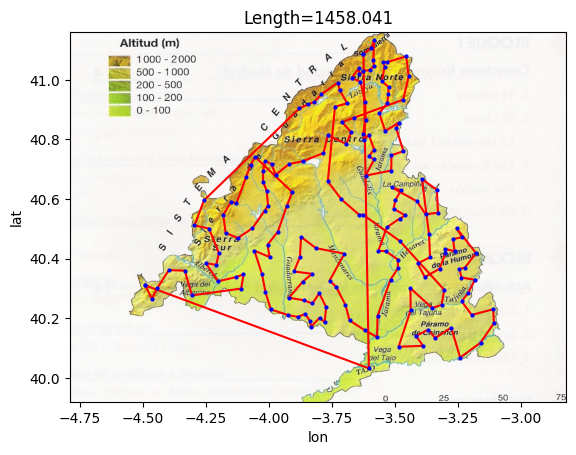

In [3]:
def greedy (cities):
    '''
    Construye una solución "buenecilla" añadiendo en cada paso la 
    ciudad más cercana de entre las que quedan por añadir
    '''
    if not cities:
        return []

    unvisited = cities[:] 
    
    sol = [unvisited.pop(0)]
    
    while unvisited:
        current_city = sol[-1]
        
        next_city = nearest(current_city, unvisited)
        
        # Añadimos la ciudad más cercana a la solución
        sol.append(next_city)
        # La eliminamos de las no visitadas
        unvisited.remove(next_city)
        
    return sol


res = greedy(cities)
print(len(res))

draw(res)

### Búsqueda local

Mientras haya mejoras, explora el entorno de vecindad para ver si encuentra una solución mejor.
 * Puede ser first improvement o best improvement.

In [4]:
def swap (p1, p2, l): # operador swap (intercambia dos ciudades en las posiciones p1 y p2)
    res = l[:] # copy the list
    res[p1], res[p2] = l[p2], l[p1]
    return res

def two_opt(l, i, j):
    
    return l[:i] + l[i:j][::-1] + l[j:]

In [5]:
def vecindad (estado, operador='swap'):
    # calcula la vecindad completa del estado aplicando el operador
    n = len(estado)
    if operador == 'swap':
        return [swap(i, j, estado) for i in range(n) for j in range(i + 1, n)]
    
    if operador == 'two_opt':
        # Evitar invertir el tour entero (i=0, j=n-1)
        return [two_opt(estado, i, j) for i in range(n) for j in range(i + 1, n) if not (i == 0 and j == n - 1)]
    
    return []

def local_search (state, fn, fnh, best_improvement=False):
    '''Búsqueda local
    state: solución de partida (aleatoria o utilizando un método constructivo).
    fn: función de evaluación (a minimizar).
    fnh: función de creación del entorno de vecindad.
    best_improvement: si usa estategia first_improvement o best_improvement
    '''
    evals = 0
    best = state
    current_eval = fn(best)
    evals += 1
    
    mejorado = True
    while mejorado:
        mejorado = False
        # Generar vecinos usando la función de vecindad
        vecinos = fnh(best)
        
        # Best Improvement
        if best_improvement:
            best_vecino = best
            best_vecino_eval = current_eval
            
            for v in vecinos:
                evals += 1
                f_v = fn(v)
                if f_v < best_vecino_eval:
                    best_vecino_eval = f_v
                    best_vecino = v
            
            if best_vecino_eval < current_eval:
                best = best_vecino
                current_eval = best_vecino_eval
                mejorado = True
                print(f"evals: {evals}; {current_eval:.2f}")

        else:
            # First Improvement
            random.shuffle(vecinos)
            
            for v in vecinos:
                evals += 1
                f_v = fn(v)
                if f_v < current_eval:
                    best = v
                    current_eval = f_v
                    mejorado = True
                    print(f"evals: {evals}; {current_eval:.2f}")
                    break 
            
    return best

evals: 15932; 10821.60
evals: 31863; 10493.38
evals: 47794; 10185.44
evals: 63725; 9894.57
evals: 79656; 9612.43
evals: 95587; 9336.83
evals: 111518; 9081.59
evals: 127449; 8832.34
evals: 143380; 8589.83
evals: 159311; 8351.35
evals: 175242; 8120.23
evals: 191173; 7914.89
evals: 207104; 7711.04
evals: 223035; 7530.60
evals: 238966; 7371.23
evals: 254897; 7214.31
evals: 270828; 7061.46
evals: 286759; 6913.05
evals: 302690; 6765.57
evals: 318621; 6624.81
evals: 334552; 6493.73
evals: 350483; 6364.68
evals: 366414; 6244.42
evals: 382345; 6130.57
evals: 398276; 6017.44
evals: 414207; 5925.26
evals: 430138; 5833.52
evals: 446069; 5685.94
evals: 462000; 5596.47
evals: 477931; 5513.37
evals: 493862; 5435.23
evals: 509793; 5344.01
evals: 525724; 5267.67
evals: 541655; 5193.72
evals: 557586; 5125.99
evals: 573517; 5060.28
evals: 589448; 4995.40
evals: 605379; 4931.38
evals: 621310; 4861.69
evals: 637241; 4803.83
evals: 653172; 4749.75
evals: 669103; 4696.14
evals: 685034; 4643.31
evals: 700965;

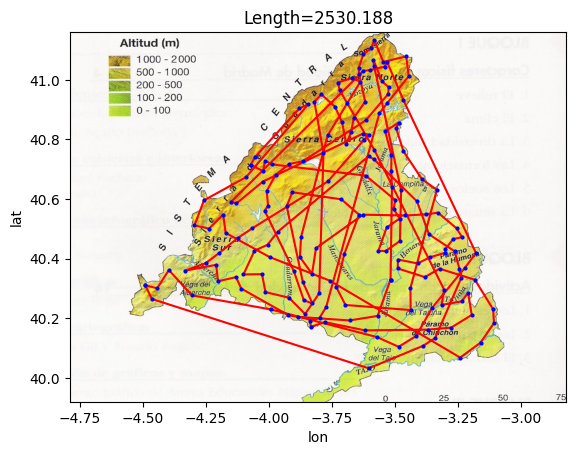

In [6]:
import random
random.shuffle(cities)

sol = local_search(cities, globaldist, vecindad, best_improvement=True)
draw(sol)

La solución encontrada depende del tipo de movimiento que elijamos, y para cada problema puede haber varios, siendo unos mejores que otros.

Para el TSP se recomienda utilizar el operador two-opt, que lo que hace es elegir dos puntos al azar e invertir la cadena entre esos dos puntos.

###  Implementación Óptima de Búsquedad Local


In [ ]:
def neighborhood_swap_delta (sol, i, j):
    """
    Calcula el delta (cambio en el coste) de un swap(i, j). 
    Esto es O(1) en lugar de O(N).
    """
    n = len(sol)
    
    a, b = sol[i], sol[j]
    prev_a, next_a = sol[(i - 1) % n], sol[(i + 1) % n]
    prev_b, next_b = sol[(j - 1) % n], sol[(j + 1) % n]

    if (i + 1) % n == j:
        # i y j adyacentes (i, j)
        removed = dist(prev_a, a) + dist(b, next_b)
        added = dist(prev_a, b) + dist(a, next_b)
    elif i == 0 and j == n - 1:
        # i y j adyacentes (j, i) por el final
        removed = dist(prev_b, b) + dist(a, next_a)
        added = dist(prev_b, a) + dist(b, next_a)
    else:
        # no adyacentes
        removed = dist(prev_a, a) + dist(a, next_a) + dist(prev_b, b) + dist(b, next_b)
        added = dist(prev_a, b) + dist(b, next_a) + dist(prev_b, a) + dist(a, next_b)

    return added - removed # Delta


def vecindad_delta (sol, fn, best_improvement=False):
    """
    Encuentra el primer o mejor vecino usando swap y nh_swap_delta.
    
    Args:
        sol (list): La solución actual.
        fn (function): La función de fitness (globaldist).
        best_improvement (bool): Estrategia de búsqueda.
    Returns:
        tuple: (mejor_vecino, fitness_vecino, evals_en_paso)
               (None, fitness_actual, evals_en_paso) si no hay mejora.
    """
    current_cost = fn(sol) # Una sola llamada a globaldist al inicio
    best_swap = None
    best_cost = current_cost
    evals = 0 # N-1 cálculos de delta
    n = len(sol)
    
    indices = list(range(n))
    if not best_improvement:
        random.shuffle(indices)

    for i in indices:
        for j in range(i + 1, n):
            evals += 1
            
            # Cálculo de delta O(1)
            delta = neighborhood_swap_delta(sol, i, j)
            new_cost = current_cost + delta
            
            if new_cost < best_cost:
                best_cost = new_cost
                best_swap = (i, j) 
                if not best_improvement:
                    return swap(i, j, sol), best_cost, evals
    
    if best_swap:
        i, j = best_swap
        return swap(i, j, sol), best_cost, evals
        
    return None, current_cost, evals

def local_search_delta (state, fn, fnh, best_improvement=False, verbose=False):
    '''Búsqueda local
    state: solución de partida (aleatoria o utilizando un método constructivo).
    fn: función de evaluación (a minimizar).
    fnh: función de creación del entorno de vecindad.
    best_improvement: si usa estategia first_improvement o best_improvement
    verbose: si imprimir o no imprimir el proceso
    '''
    best = state[:]
    current_cost = fn(best)
    total_evals = 1 # 1 por la evaluación inicial
    
    if verbose:
        print(f"evals: {total_evals}; {current_cost:.2f}")

    while True:
        new_sol, new_cost, evals = fnh(best, fn, best_improvement)
        
        total_evals += evals
        
        if new_sol is None:
            break # Óptimo local alcanzado
        
        best = new_sol
        current_cost = new_cost
        if verbose:
            print(f"evals: {total_evals}; {current_cost:.2f}") 
        
    return best

evals: 1; 10167.91
evals: 15932; 9859.23
evals: 31863; 9583.22
evals: 47794; 9329.56
evals: 63725; 9078.73
evals: 79656; 8822.69
evals: 95587; 8576.41
evals: 111518; 8335.55
evals: 127449; 8114.09
evals: 143380; 7894.59
evals: 159311; 7698.18
evals: 175242; 7508.05
evals: 191173; 7321.22
evals: 207104; 7144.93
evals: 223035; 6953.56
evals: 238966; 6818.61
evals: 254897; 6686.08
evals: 270828; 6553.83
evals: 286759; 6423.19
evals: 302690; 6295.39
evals: 318621; 6171.69
evals: 334552; 6049.60
evals: 350483; 5934.72
evals: 366414; 5801.81
evals: 382345; 5697.50
evals: 398276; 5599.21
evals: 414207; 5501.78
evals: 430138; 5408.52
evals: 446069; 5318.22
evals: 462000; 5223.75
evals: 477931; 5139.41
evals: 493862; 5056.68
evals: 509793; 4977.12
evals: 525724; 4908.41
evals: 541655; 4844.44
evals: 557586; 4785.82
evals: 573517; 4727.90
evals: 589448; 4672.13
evals: 605379; 4623.92
evals: 621310; 4578.53
evals: 637241; 4534.00
evals: 653172; 4490.90
evals: 669103; 4449.52
evals: 685034; 4408.5

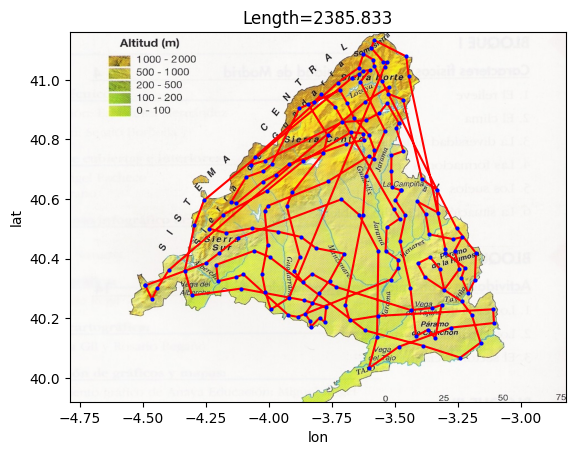

In [8]:
import random
random.shuffle(cities)

sol = local_search_delta(cities, 
                         globaldist, 
                         vecindad_delta, 
                         best_improvement=True, 
                         verbose=True)
draw(sol)

### Iterated Local Search

Repite la búsqueda local cierto número de veces aplicando una perturbación a la solución anterior encontrada.


In [9]:
from random import choices

def perturbate_tsp (state, N=1): 
    
    state = state.copy()
    for _ in range(N):
        i, j = choices(range(len(state)), k = 2)
        state = swap(i, j, state)
        
    return state
    
def ILS (state, fn, fnh, perturbate, N=10, NP=1, best_improvement=False):
    '''Iterated Local Search:
    state: solución de partida (aleatoria o utilizando un método constructivo).
    fn: función de evaluación (a minimizar). Se aplica a una solución y devuelve su valor de la función objetivo.
    fnh: función de creación del entorno de vecindad. Se aplica a un estado.
    perturbate: función para perturbar una solución. Se aplica a una solución y devuelve otra.
    N: Número de iteraciones
    NP: número de perturbaciones
    best_improvement: si usa estategia first_improvement o best_improvement
    '''

    best = local_search(state, fn, fnh, best_improvement)
    current_eval = fn(best)
    for i in range(N):
        s_p = perturbate(best, NP)
        s_pa = local_search(s_p, fn, fnh, best_improvement)

        new_eval = fn(s_pa)
        if new_eval < current_eval:
            best = s_pa
            current_eval = new_eval
        
    return best

evals: 3; 10386.14
evals: 4; 10336.07
evals: 6; 10331.18
evals: 8; 10247.04
evals: 9; 10175.18
evals: 10; 10152.16
evals: 12; 10137.22
evals: 13; 10085.68
evals: 17; 10071.21
evals: 20; 9975.76
evals: 22; 9928.16
evals: 24; 9924.23
evals: 26; 9876.08
evals: 27; 9773.16
evals: 28; 9768.13
evals: 30; 9734.04
evals: 31; 9669.74
evals: 32; 9451.84
evals: 34; 9451.80
evals: 35; 9450.05
evals: 38; 9445.95
evals: 45; 9399.37
evals: 48; 9380.84
evals: 52; 9374.82
evals: 53; 9368.47
evals: 54; 9345.16
evals: 55; 9307.10
evals: 57; 9299.91
evals: 59; 9211.51
evals: 64; 9111.86
evals: 67; 9109.00
evals: 68; 9069.53
evals: 76; 9021.37
evals: 81; 8958.97
evals: 85; 8927.96
evals: 90; 8926.27
evals: 92; 8908.87
evals: 94; 8907.39
evals: 96; 8900.29
evals: 98; 8871.76
evals: 100; 8820.57
evals: 101; 8800.22
evals: 102; 8696.48
evals: 106; 8674.79
evals: 107; 8669.65
evals: 111; 8620.00
evals: 114; 8618.64
evals: 117; 8555.06
evals: 131; 8329.84
evals: 135; 8245.68
evals: 143; 8241.51
evals: 145; 8216

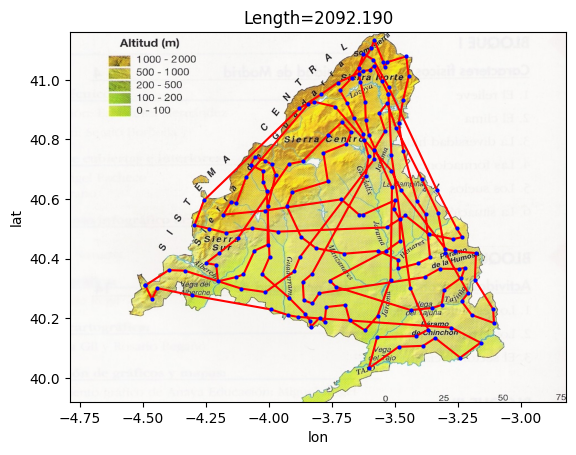

In [10]:
random.shuffle(cities)
sol = ILS(cities, globaldist, vecindad, perturbate_tsp, NP=2, best_improvement=False)
draw(sol)

### Comentarios finales sobre el TSP

  * Hay varias vecindades interesantes en https://dm865.github.io/assets/dm865-tsp-ls-handout.pdf
  * El fitness se puede calcular en una búsqueda local con deltas, es decir, alterando la evaluación anterior teniendo en cuenta el cambio realizado, lo que hace la evaluación mucho más rápida. Por ejemplo, si una ciudad se intercambia por otra sólo hay que restar 4 valores y sumar otros 4, en lugar de recorrer la lista entera.
  * Según el teorema de no free lunch, esto hace nuestro algoritmo más específico del problema TSP.

### Búsqueda GRASP

In [11]:
def _grasp(cities, beta=0.3):
    """
    Construye una solución usando una estrategia Greedy Aleatorizada (GRASP).
    Empieza por la primera ciudad de la lista.

    beta (0.0 a 1.0): Parámetro de aleatorización.
        - 0.0 = Totalmente greedy (RCL de tamaño 1)
        - 1.0 = Totalmente aleatorio (RCL incluye todas las opciones)
    """
    if not cities:
        return []

    unvisited = cities[:]
    sol = [unvisited.pop(0)] 

    while unvisited:
        current_city = sol[-1]

        min_cost = float('inf')
        max_cost = float('-inf')
        costs_tuples = []
        
        for city in unvisited:
            cost = dist(current_city, city)
            costs_tuples.append((cost, city))
            if cost < min_cost:
                min_cost = cost
            if cost > max_cost:
                max_cost = cost

        if not costs_tuples:
            break
        
        # El umbral es min + beta * (rango)
        threshold = min_cost + beta * (max_cost - min_cost)

        # Construir la RCL (candidatos con coste bajo el umbral)
        rcl = [city for cost, city in costs_tuples if cost <= threshold]

        # Seleccionar aleatoriamente de la RCL y añadir a la solución
        next_city = random.choice(rcl)
        sol.append(next_city)
        unvisited.remove(next_city)

    return sol

def GRASP(cities_list, fn, fnh_move, beta=0.3, best_improvement=True, max_iters_grasp=100,
          verbose=False):
    """
    Algoritmo GRASP (Greedy Randomized Adaptive Search Procedure).

    Args:
        cities_list (list): Lista de todas las ciudades.
        fn (function): Función de fitness (globaldist).
        fnh_move (function): Función de movimiento/vecindad (nh_move_all).
        beta (float): Parámetro de aleatorización para _grasp.
        best_improvement (bool): Estrategia para local_search.
        max_iters_grasp (int): Número de iteraciones de GRASP.
    """
    best_sol = None
    best_cost = float('inf')

    if verbose:
        print(f"beta={beta}, Iteraciones={max_iters_grasp}")

    for i in range(max_iters_grasp):
        # Hacemos una copia y barajamos para que la construcción empiece
        # cada vez en una ciudad aleatoria.
        current_cities = cities_list[:]
        random.shuffle(current_cities)

        # Fase de Construcción
        s_constructed = _grasp(current_cities, beta)
        
        # Fase de Búsqueda Local
        s_local_opt = local_search_delta(s_constructed, fn, fnh_move, best_improvement)
        f_local_opt = fn(s_local_opt)
 
        if verbose:
            f_constructed = fn(s_constructed)
            print(f"Iteración {i+1}/{max_iters_grasp}: "
                  f"Construido = {f_constructed:.2f}, "
                  f"Mejorado (Local Search) = {f_local_opt:.2f}")

        # Actualizar la mejor solución global
        if f_local_opt < best_cost:
            best_cost = f_local_opt
            best_sol = s_local_opt
            print(f"Mejor solución global encontrada {best_cost:.2f}")

    print(f"\n Mejor solución global: {best_cost:.2f}")
    return best_sol

beta=0.2, Iteraciones=40
Iteración 1/40: Construido = 3473.44, Mejorado (Local Search) = 1828.65
Mejor solución global encontrada 1828.65
Iteración 2/40: Construido = 3407.44, Mejorado (Local Search) = 1696.39
Mejor solución global encontrada 1696.39
Iteración 3/40: Construido = 3421.79, Mejorado (Local Search) = 1828.24
Iteración 4/40: Construido = 3293.15, Mejorado (Local Search) = 1658.76
Mejor solución global encontrada 1658.76
Iteración 5/40: Construido = 3553.84, Mejorado (Local Search) = 1806.18
Iteración 6/40: Construido = 3446.65, Mejorado (Local Search) = 1825.99
Iteración 7/40: Construido = 3259.12, Mejorado (Local Search) = 1710.89
Iteración 8/40: Construido = 3382.00, Mejorado (Local Search) = 1753.69
Iteración 9/40: Construido = 3424.68, Mejorado (Local Search) = 1866.29
Iteración 10/40: Construido = 3409.00, Mejorado (Local Search) = 1703.41
Iteración 11/40: Construido = 3304.57, Mejorado (Local Search) = 1720.64
Iteración 12/40: Construido = 3507.72, Mejorado (Local Sea

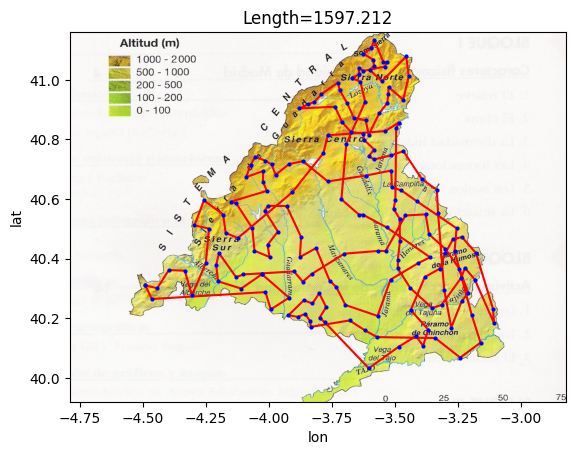

In [12]:
BETA_GRASP = 0.20      
ITERS_GRASP = 40        

sol_grasp = GRASP(cities, 
                  globaldist, 
                  vecindad_delta,       
                  beta=BETA_GRASP, 
                  best_improvement=True, 
                  max_iters_grasp=ITERS_GRASP,
                  verbose=True)

draw(sol_grasp)

# Temple Simulado

In [13]:
def temple_simulado (state, fn, fnh, operador='swap', best_improvement=False, eps=0.5, descenso=0.999):
    '''temple_simulado
    state: solución de partida (aleatoria o utilizando un método constructivo).
    fn: función de evaluación (a minimizar).
    fnh: función de creación del entorno de vecindad.
    best_improvement: si usa estategia first_improvement o best_improvement
    '''

    evals = 0
    best = state
    current_eval = fn(best)
    evals += 1
    
    mejorado = True
    while mejorado:
        mejorado = False

        # Generar vecinos usando la función de vecindad
        vecinos = fnh(best, operador)
        eps = eps*descenso
        if random.random() < eps:
            best = perturbate_tsp(best)
            current_eval = fn(best)
            mejorado = True
        
        else:
            # Best Improvement
            if best_improvement:
                best_vecino = best
                best_vecino_eval = current_eval
                
                for v in vecinos:
                    evals += 1
                    f_v = fn(v)
                    if f_v < best_vecino_eval:
                        best_vecino_eval = f_v
                        best_vecino = v
                
                if best_vecino_eval < current_eval:
                    best = best_vecino
                    current_eval = best_vecino_eval
                    mejorado = True
                    print(f"evals: {evals}; {current_eval:.2f}")


            else:
                # First Improvement
                mejorado = False
                random.shuffle(vecinos)
                
                for v in vecinos:
                    evals += 1
                    f_v = fn(v)
                    if f_v < current_eval:
                        best = v
                        current_eval = f_v
                        mejorado = True
                        print(f"evals: {evals}; {current_eval:.2f}")
                        break
        

            
    return best

evals: 15931; 10479.66
evals: 31861; 10213.02
evals: 47791; 10017.46
evals: 63721; 9868.79
evals: 79651; 9692.54
evals: 95581; 9687.51
evals: 111511; 9499.86
evals: 127441; 9314.79
evals: 143371; 9130.84
evals: 159301; 8949.59
evals: 175231; 8778.46
evals: 191161; 8714.82
evals: 207091; 8548.93
evals: 223021; 8383.27
evals: 238951; 8221.28
evals: 254881; 8050.14
evals: 270811; 7906.18
evals: 286741; 7748.97
evals: 302671; 7716.66
evals: 318601; 7563.93
evals: 334531; 7576.29
evals: 350461; 7427.60
evals: 366391; 7539.93
evals: 382321; 7244.98
evals: 398251; 7149.45
evals: 414181; 7018.26
evals: 430111; 6887.53
evals: 446041; 6740.40
evals: 461971; 6600.43
evals: 477901; 6466.79
evals: 493831; 6335.78
evals: 509761; 6488.63
evals: 525691; 6386.36
evals: 541621; 6256.13
evals: 557551; 6321.33
evals: 573481; 6198.29
evals: 589411; 6179.93
evals: 605341; 6487.43
evals: 621271; 6322.91
evals: 637201; 6198.65
evals: 653131; 6216.88
evals: 669061; 6089.48
evals: 684991; 6149.56
evals: 700921;

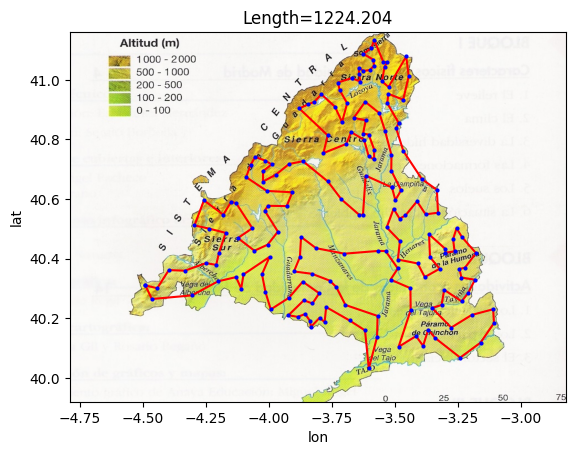

In [14]:
random.shuffle(cities)
sol_temple = temple_simulado(cities, globaldist, vecindad, operador='two_opt', best_improvement=True)
draw(sol_temple)